## ExMAS
> Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations
> 
> Kucharski R., Cats O. ,_Transportation Research Part: B_, 2020

---
#### Importing networks



In [1]:
import os
cwd = os.getcwd()

In [2]:
os.chdir(os.path.join(cwd,'../..'))
import ExMAS.main
import ExMAS.utils

-----
## Import network and compute skim for a city
Here we download city graph, compute the skims and save to graphml and csvs
for future use in ExMAS

It:
* loads data for `params.city` 
* computes the skim, 
* saves the files into `params.paths.skim` and `params.paths.G`

#### Download single city and save skims

In [3]:
params = ExMAS.utils.get_config('ExMAS/data/configs/default.json')

In [4]:
params.city = 'Wieliczka, Poland'
params = ExMAS.utils.make_paths(params) #update file paths

In [5]:
from ExMAS.utils import inData as inData

In [6]:
inData = ExMAS.utils.download_G(inData, params) # download the graph and compute the skim

In [7]:
ExMAS.utils.save_G(inData, params) # save it to params.paths.G

----

#### Some osmnx tutorial
we import graphs with `osmnx` 

for different cities, change the string

--- 
### 1. Import driveable network for `Delft`

In [8]:
#small imports
import sys
import random
import time
import pprint
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [16, 16]

In [9]:
#big imports
import osmnx as ox #OSM download and parse
import pandas as pd 
import networkx as nx #graphs

In [10]:
G = ox.graph_from_place('Delft, Netherlands', network_type='drive')

### 2. Plot it

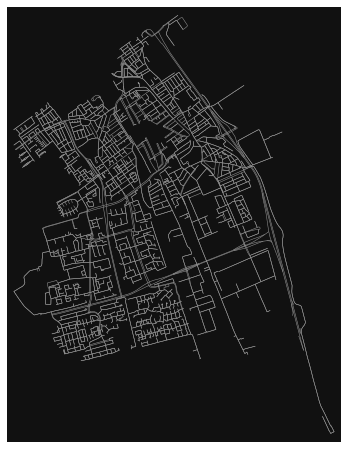

In [11]:
_ = ox.plot_graph(G,node_size=0, edge_linewidth=0.5)

#### * Network stats

In [12]:
pprint.pprint(ox.basic_stats(G))

{'circuity_avg': 1.086071742864847,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None,
 'edge_density_km': None,
 'edge_length_avg': 89.1742880122557,
 'edge_length_total': 465668.1319999993,
 'intersection_count': 1789,
 'intersection_density_km': None,
 'k_avg': 4.696043165467626,
 'm': 5222,
 'n': 2224,
 'node_density_km': None,
 'self_loop_proportion': 0.005936422826503256,
 'street_density_km': None,
 'street_length_avg': 91.92460183968485,
 'street_length_total': 279818.4880000007,
 'street_segments_count': 3044,
 'streets_per_node_avg': 2.739658273381295,
 'streets_per_node_counts': {0: 0, 1: 435, 2: 63, 3: 1383, 4: 332, 5: 11},
 'streets_per_node_proportion': {0: 0.0,
                                 1: 0.19559352517985612,
                                 2: 0.028327338129496404,
                                 3: 0.6218525179856115,
                                 4: 0.14928057553956833,
                                 5: 0.0049460431654676255}}


### 3. Graph data

In [13]:
G.get_edge_data(1501364225, 1402613311)

{0: {'osmid': 136852791,
  'oneway': True,
  'lanes': '1',
  'name': 'Brasserskade',
  'highway': 'unclassified',
  'maxspeed': '50',
  'length': 14.888}}

#### DataFrame and .csv export

In [14]:
df = nx.to_pandas_edgelist(G)
df.to_csv('Delft.csv')
df.head()

,source,target,tunnel,highway,bridge,geometry,osmid,ref,length,junction,oneway,lanes,name,access,width,maxspeed
0,1501364225,1402613311,NaN,unclassified,NaN,NaN,136852791,NaN,14.888,NaN,True,1,Brasserskade,NaN,NaN,50
1,1501364225,1501364218,NaN,secondary,NaN,"LINESTRING (4.362211 52.0275607, 4.3622056 52....",136852797,NaN,86.030,NaN,True,3,Brasserskade,NaN,NaN,50
2,1269112834,626146739,NaN,tertiary,yes,"LINESTRING (4.3500691 51.9964222, 4.3492182 51...","[131635875, 812784588, 131635877]",NaN,229.396,NaN,True,1,Pierre van Hauwelaan,NaN,NaN,50
3,44875780,44875431,NaN,living_street,NaN,NaN,7538524,NaN,22.932,NaN,False,NaN,Vernieuwde Boogerd,NaN,NaN,15
4,44875780,1371031431,NaN,living_street,NaN,NaN,364437785,NaN,55.130,NaN,False,NaN,Koningsplein,NaN,NaN,15


### 4. Graph searches 

In [15]:
node_list = list(G.nodes)
o = random.choice(node_list)
d = random.choice(node_list)

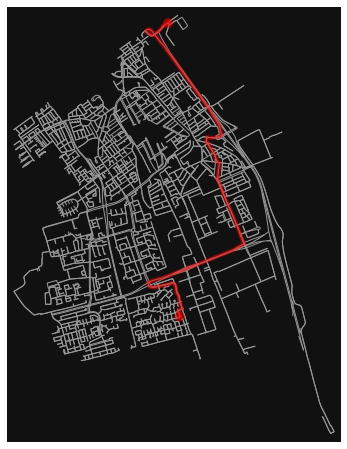

In [16]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, o, d, weight='length')
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [17]:
print("Shorthest path from node {} to node {} distance: {}m".format(o,d,nx.shortest_path_length(G, o, d, weight='length')))

Shorthest path from node 1402613338 to node 44725075 distance: 7793.764000000002m


### 5. Skim matrices

In [18]:
skim = dict(nx.all_pairs_dijkstra_path_length(G, weight = 'length')) # may take some time

In [19]:
o = random.choice(node_list)
d = random.choice(node_list)
print("From node {} to node {} distance: {}m".format(o,d,round(skim[o][d])))

From node 1584637090 to node 1402734804 distance: 1941m


-------------
Rafal Kucharski, 2019, Delft, r.m.kucharski@tudelft.nl